#                 LOGISTIC REGRESSION : MARITIAL STATUS PREDICTION

Logistic regression is one of the most popular Machine Learning Algorithm, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

Logistic Regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value.It can be either yes or no, 0 or 1, True or False, etc. but instead of giving the exact value as 0 and 1, it gived the probabilistic values which lie between 0 and 1.

Type of Logistic Regression:

   On the basis of the categories, Logistic Regression can be classified into three types:

1. Binomial: In binomial Logistic regression, there can be only two possible types of the dependent variables, such as 0 or 1, Pass or Fail, etc.
2. Multinomial: In multinomial Logistic regression, there can be 3 or more possible unordered types of the dependent variable, such as "cat", "dogs", or "sheep"
Ordinal: In ordinal Logistic regression, there can be 3 or more possible ordered types of dependent variables, such as "low", "Medium", or "High".

Steps in Logistic Regression: 

To implement the Logistic Regression using Python, we will use the same steps as we have done in previous topics of Regression. Below are the steps:

Data Pre-processing step

Fitting Logistic Regression to the Training set

Predicting the test result

Test accuracy of the result(Creation of Confusion matrix)

Visualizing the test set result.

#  Equation of Logistic Regression

In Logistc Regression y can be between 0 and 1 only, so for this let's divide the above equation by (1-y):

  y/1-y 0 for y=1, infinity for y=0
But we need range b/w -[infinity] to =[infinity], then take logarithm of the equation it will become:

 log(y/1-y)= b0+b1x1+b2x2+....+bnxn

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('marital status.csv')
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,0.0
8,29,1.0
9,22,0.0


# Check Null Value

In [4]:
df.isnull().sum()

age       0
status    1
dtype: int64

# Handle Null Value

In [5]:
handle=df['status'].median()

In [6]:
handle

0.0

In [7]:
df.status = df.status.fillna(handle)

In [8]:
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,0.0
8,29,1.0
9,22,0.0


In [10]:
df['status'].value_counts()

status
0.0    11
1.0     9
Name: count, dtype: int64

# Split Dependent and Independent variable 

In [11]:
x = df[['age']]
x

,age
0,21
1,33
2,24
3,28
4,17
5,33
6,23
7,30
8,29
9,22


In [12]:
y = df[['status']]
y

,status
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0
5,1.0
6,0.0
7,0.0
8,1.0
9,0.0


# Split train and test dataset

In [13]:
from sklearn.model_selection import train_test_split # here use module name as sklearn.mosel_selection & package is train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
x_train

,age
8,29
5,33
11,20
3,28
18,26
16,16
13,24
2,24
9,22
19,25


In [15]:
x_test

,age
0,21
17,18
15,29
1,33


#    Apply Logistic Regression Algorithm

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [17]:
model.fit(x_train,y_train)

C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [18]:
model.predict(x_test)

array([0., 0., 1., 1.])

In [19]:
model.score(x_train,y_train)

0.875

In [20]:
model.score(x_test,y_test)

1.0

#     Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[2, 0],
       [0, 2]])

<Axes: >

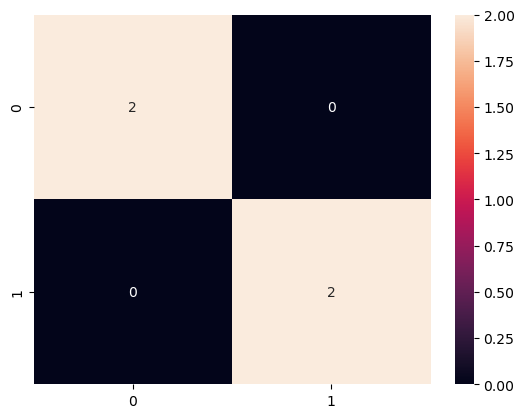

In [23]:
import seaborn as sns
sns.heatmap(cm, annot=True)